<a href="https://colab.research.google.com/github/Medveks/DATA_SCIENCE_WORKS/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


#sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
#from tensorflow.python.keras.optimizers import Adam, RMSprop

from PIL import Image

%matplotlib inline

# Новый раздел

Используем первую колонку исходного датасета как индексю Сразу проверим, что загрузилось

In [61]:
df_xnup = pd.read_excel('/content/X_nup.xlsx',index_col=0)
df_xnup.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [62]:
df_xbp = pd.read_excel('/content/X_bp.xlsx',index_col=0)
df_xbp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


##Объединим датафреймы по индексу объединения INNER

In [63]:
df_pr = df_xbp.merge(df_xnup, left_index = True, right_index = True, how = 'inner')
df_pr.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

##Первые 10 строк

In [64]:
df_pr.head(10)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   
5.0                         2.767918            2000.0             748.000000   
6.0                         2.569620            1910.0             807.000000   
7.0                         2.561475            1900.0             535.000000   
8.0                         3.557018            1930.0             889.000000   
9.0                         3.532338            2100.0            1421.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   
5.0                       111.86                        22.267857   
6.0                       111.86                        22.267857   
7.0                       111.86                        22.267857   
8.0                       129.00                        21.250000   
9.0                       129.00                        21.250000   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   
5.0                284.615385                          210.0   
6.0                284.615385                          210.0   
7.0                284.615385                          380.0   
8.0                300.000000                          380.0   
9.0                300.000000                         1010.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   
5.0                                  70.0                         3000.0   
6.0                                  70.0                         3000.0   
7.0                                  75.0                         1800.0   
8.0                                  75.0                         1800.0   
9.0                                  78.0                         2000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   
5.0                    220.0                 0.0          5.0   
6.0                    220.0                 0.0          5.0   
7.0                    120.0                 0.0          7.0   
8.0                    120.0                 0.0          7.0   
9.0                    300.0                 0.0          7.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70

## Проверяем наличие пропусков в данных 

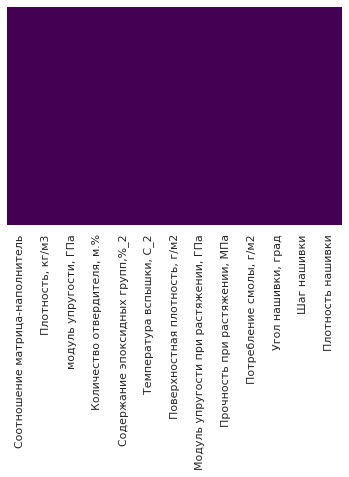

In [65]:
sns.heatmap(df_pr.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Пропуски данных отсутствуют


##Описательная статистика

In [66]:
df_pr.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

##Заменим значение параметра "Угол нашивки, град" с помощью LabelEncoder


In [35]:
##вариант1

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_pr['Угол нашивки, град'] = le.fit_transform(df_pr['Угол нашивки, град'])
df_pr['Угол нашивки, град']

0.0       0
1.0       0
2.0       0
3.0       0
4.0       0
         ..
1018.0    1
1019.0    1
1020.0    1
1021.0    1
1022.0    1
Name: Угол нашивки, град, Length: 1023, dtype: int64

In [ ]:
##вариант 2: С помощью LabelEncoder закодируем кгол нашивки в 0,1

In [68]:
le=LabelEncoder()
df_pr['Угол нашивки, град'] = le.fit_transform(df_pr['Угол нашивки, град'])
df_pr

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                       3000.000000               220.000000   
1.0                       3000.000000               220.000000   
2.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

In [69]:
df_pr.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки

1023 записи, пропусков нет


##Описательная статистика: Квартили, среднее, медианное значение для каждого параметра

In [70]:
df_pr.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean             0.491691     6.899222          57.153929  
std              0.500175     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%              1.000000     8.586293          64.944961  
max              1.000000    14.440522         103.988901

##Разведочный анализ данных

##Строим диаграммы распределения для каждого параметра


In [39]:
#Гистограммы

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

<Figure size 1080x360 with 0 Axes>

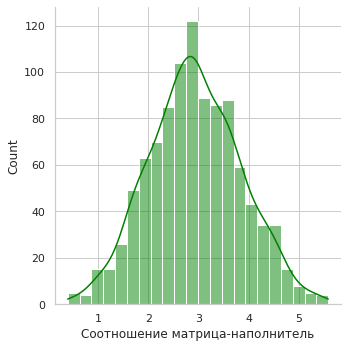

<Figure size 1080x360 with 0 Axes>

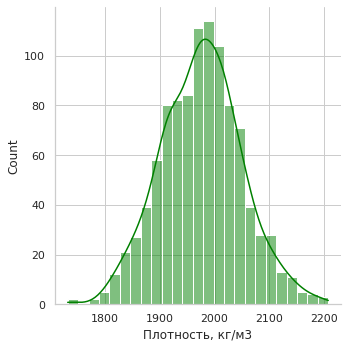

<Figure size 1080x360 with 0 Axes>

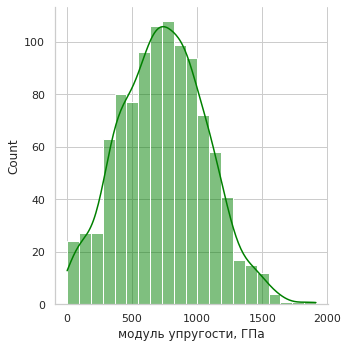

<Figure size 1080x360 with 0 Axes>

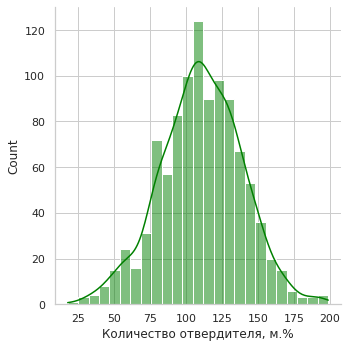

<Figure size 1080x360 with 0 Axes>

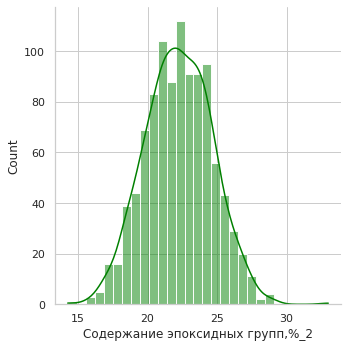

<Figure size 1080x360 with 0 Axes>

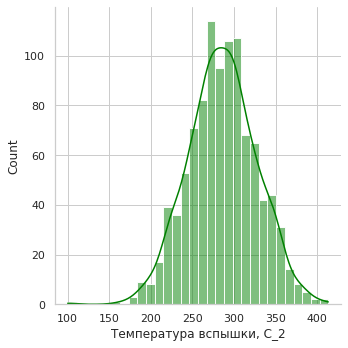

<Figure size 1080x360 with 0 Axes>

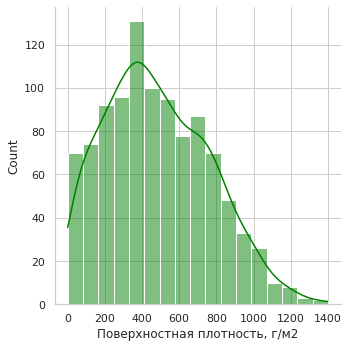

<Figure size 1080x360 with 0 Axes>

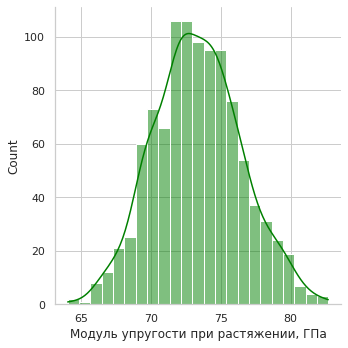

<Figure size 1080x360 with 0 Axes>

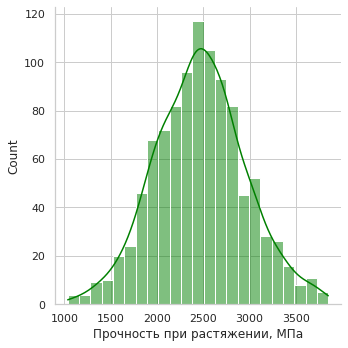

<Figure size 1080x360 with 0 Axes>

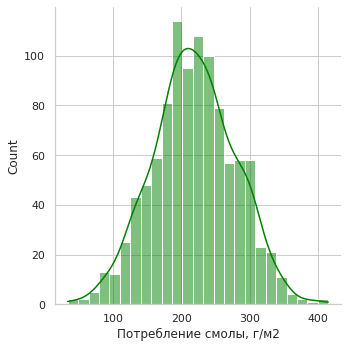

<Figure size 1080x360 with 0 Axes>

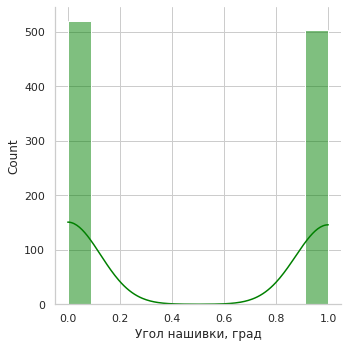

<Figure size 1080x360 with 0 Axes>

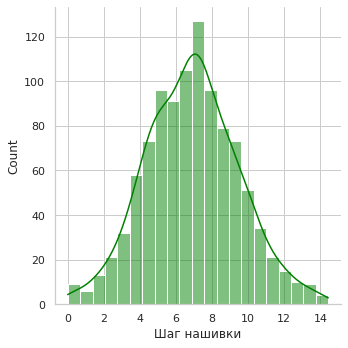

<Figure size 1080x360 with 0 Axes>

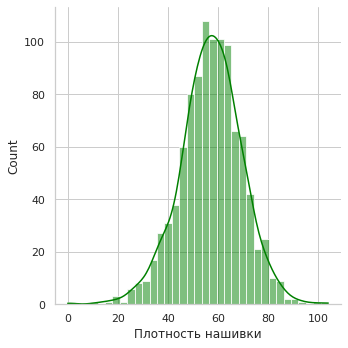

In [40]:
for i in df_pr.columns:
    plt.figure(figsize=(15,5))
    sns.set(
        style="whitegrid"
        )
    sns.displot(x=i, kde=True, color='green', data=df_pr);

Дискретное распределение данных по параметру:
- Угол нашивки, град

Распределение данных близки к нормальному по параметрам:
- Плотность, кг/v3
- Модуль упругости, ГПа
- Количество отвердителя, м%
- Содержание эпоксидных групп
- Температура вспышки
- Поверхностная плотность
- Модуль упругости при растяжении
- Прочность при растяжении
- Потребление смолы
- Шаг нашивки
- Плотность нашивки



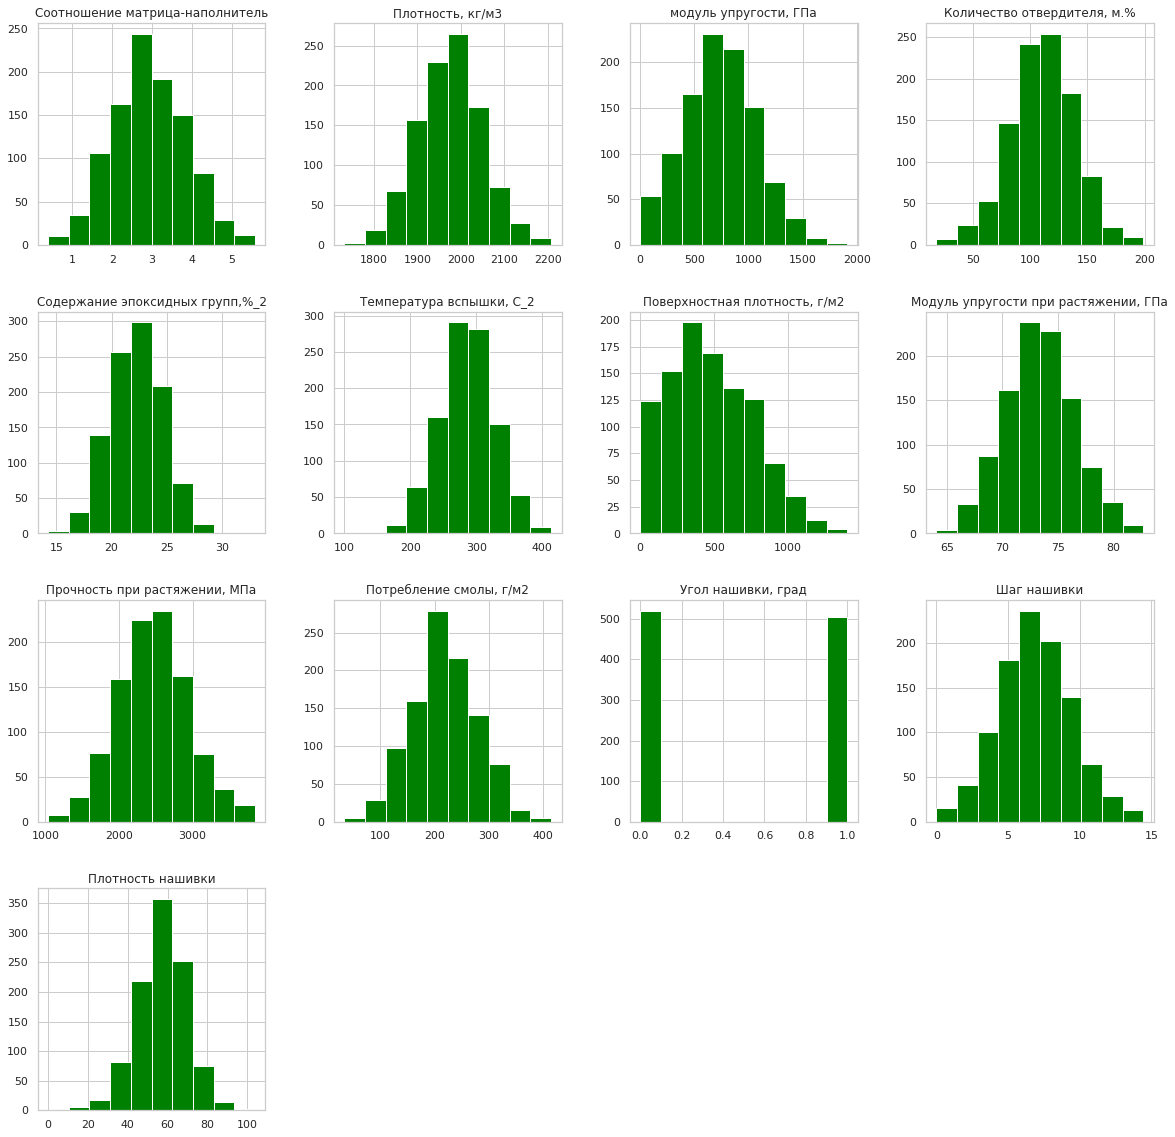

In [41]:


df_pr.hist(figsize=(20,20), color = 'green')
plt.show()

##Диаграмма размаха или "Ящик с усами"

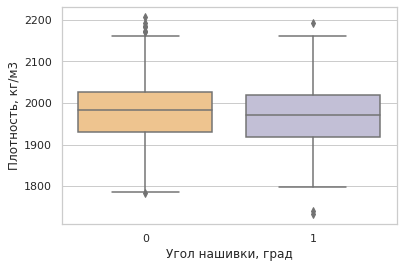

In [42]:
sns.boxplot(x='Угол нашивки, град', y='Плотность, кг/м3', data=df_pr, palette='PuOr')

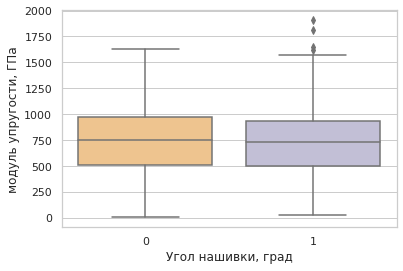

In [18]:
sns.boxplot(x='Угол нашивки, град', y='модуль упругости, ГПа', data=df_pr, palette='PuOr')

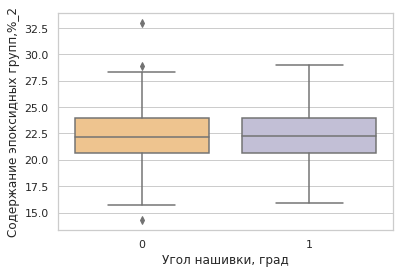

In [19]:
sns.boxplot(x='Угол нашивки, град', y='Содержание эпоксидных групп,%_2', data=df_pr, palette='PuOr')

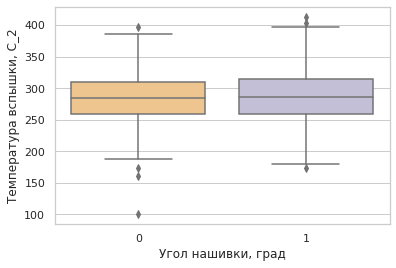

In [20]:
sns.boxplot(x='Угол нашивки, град', y='Температура вспышки, С_2', data=df_pr, palette='PuOr')

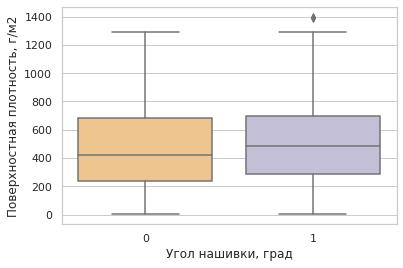

In [21]:
sns.boxplot(x='Угол нашивки, град', y='Поверхностная плотность, г/м2', data=df_pr, palette='PuOr')

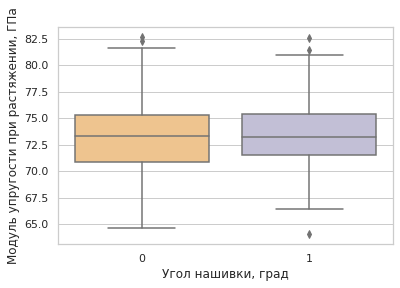

In [22]:
sns.boxplot(x='Угол нашивки, град', y='Модуль упругости при растяжении, ГПа', data=df_pr, palette='PuOr')

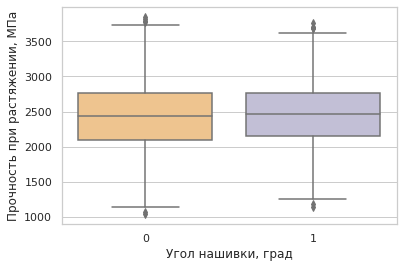

In [23]:
sns.boxplot(x='Угол нашивки, град', y='Прочность при растяжении, МПа', data=df_pr, palette='PuOr')

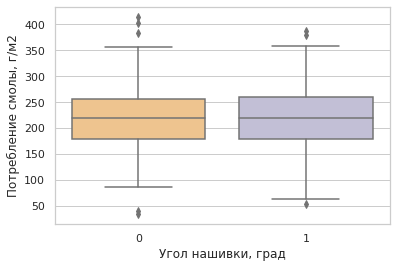

In [24]:
sns.boxplot(x='Угол нашивки, град', y='Потребление смолы, г/м2', data=df_pr, palette='PuOr')

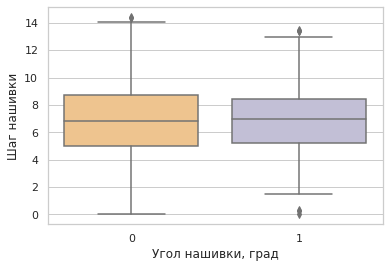

In [25]:
sns.boxplot(x='Угол нашивки, град', y='Шаг нашивки', data=df_pr, palette='PuOr')

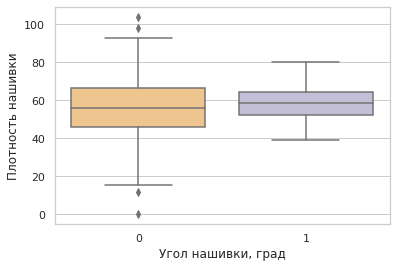

In [26]:
sns.boxplot(x='Угол нашивки, град', y='Плотность нашивки', data=df_pr, palette='PuOr')

##Попарные графики рассеивания точек (игрались с цветами- не обязательно)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


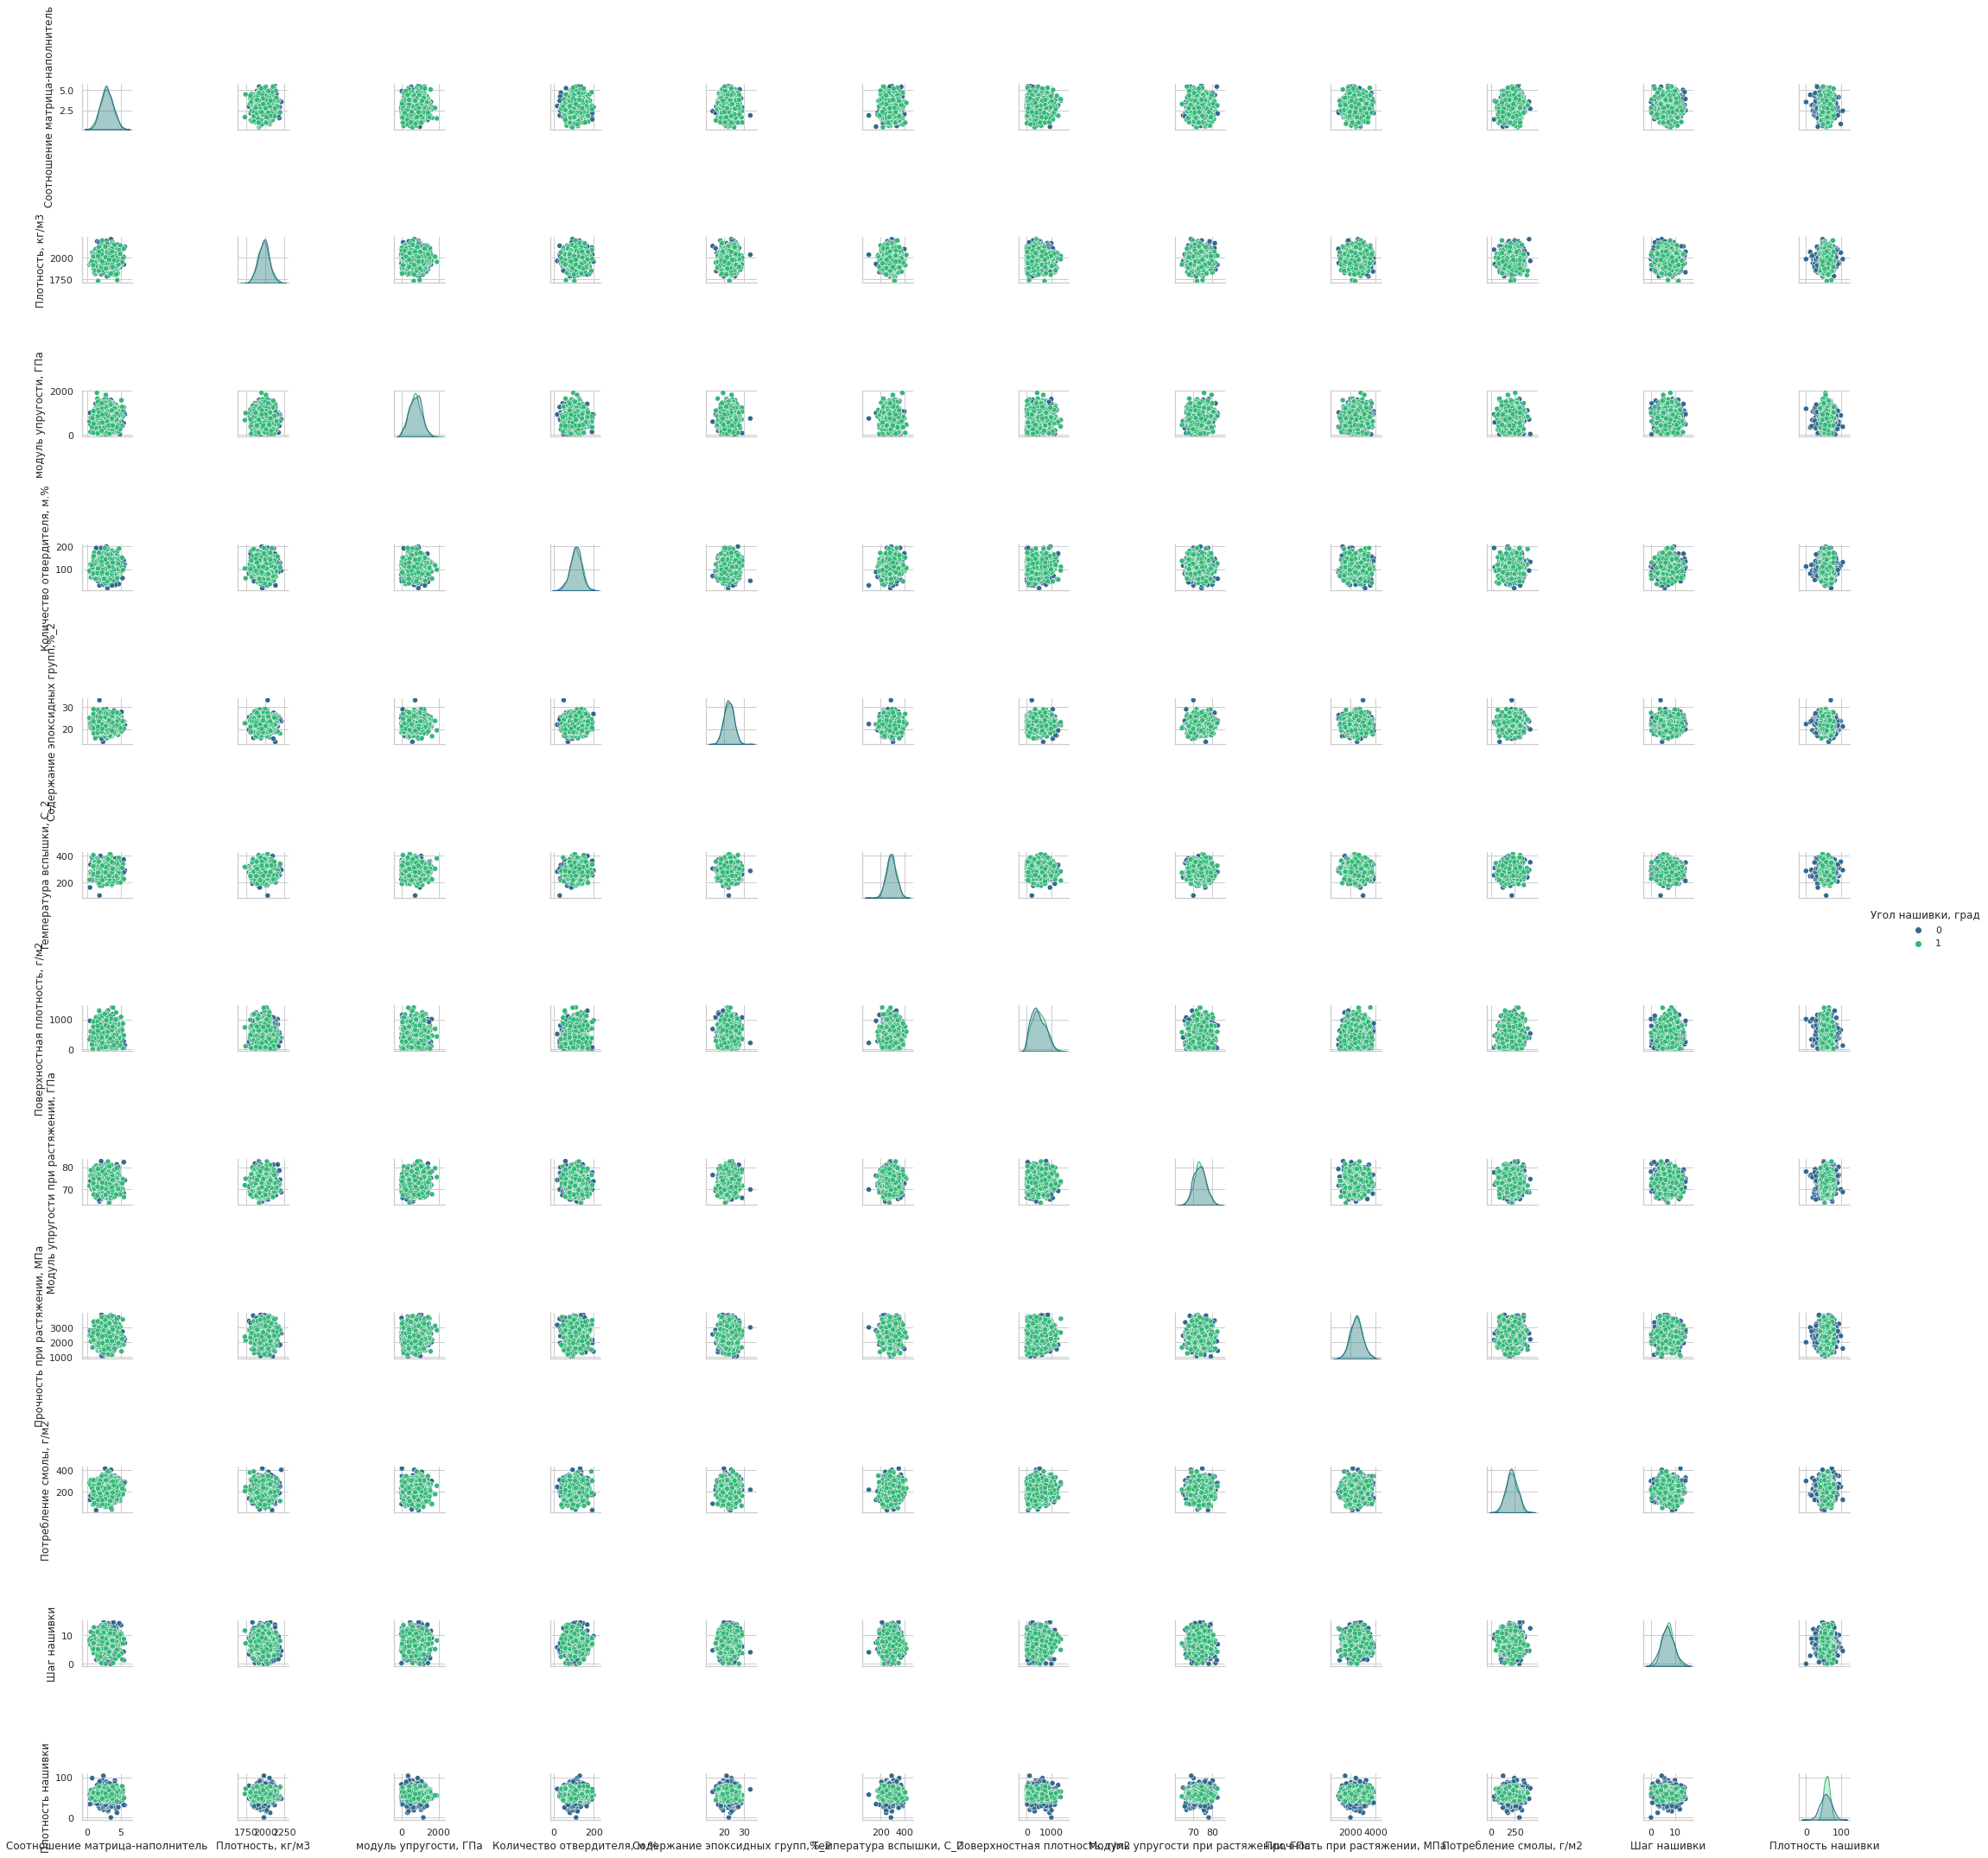

In [43]:
sns.pairplot(data=df_pr, hue='Угол нашивки, град', palette='viridis')

##Для угла наштвки = 0 градусов

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


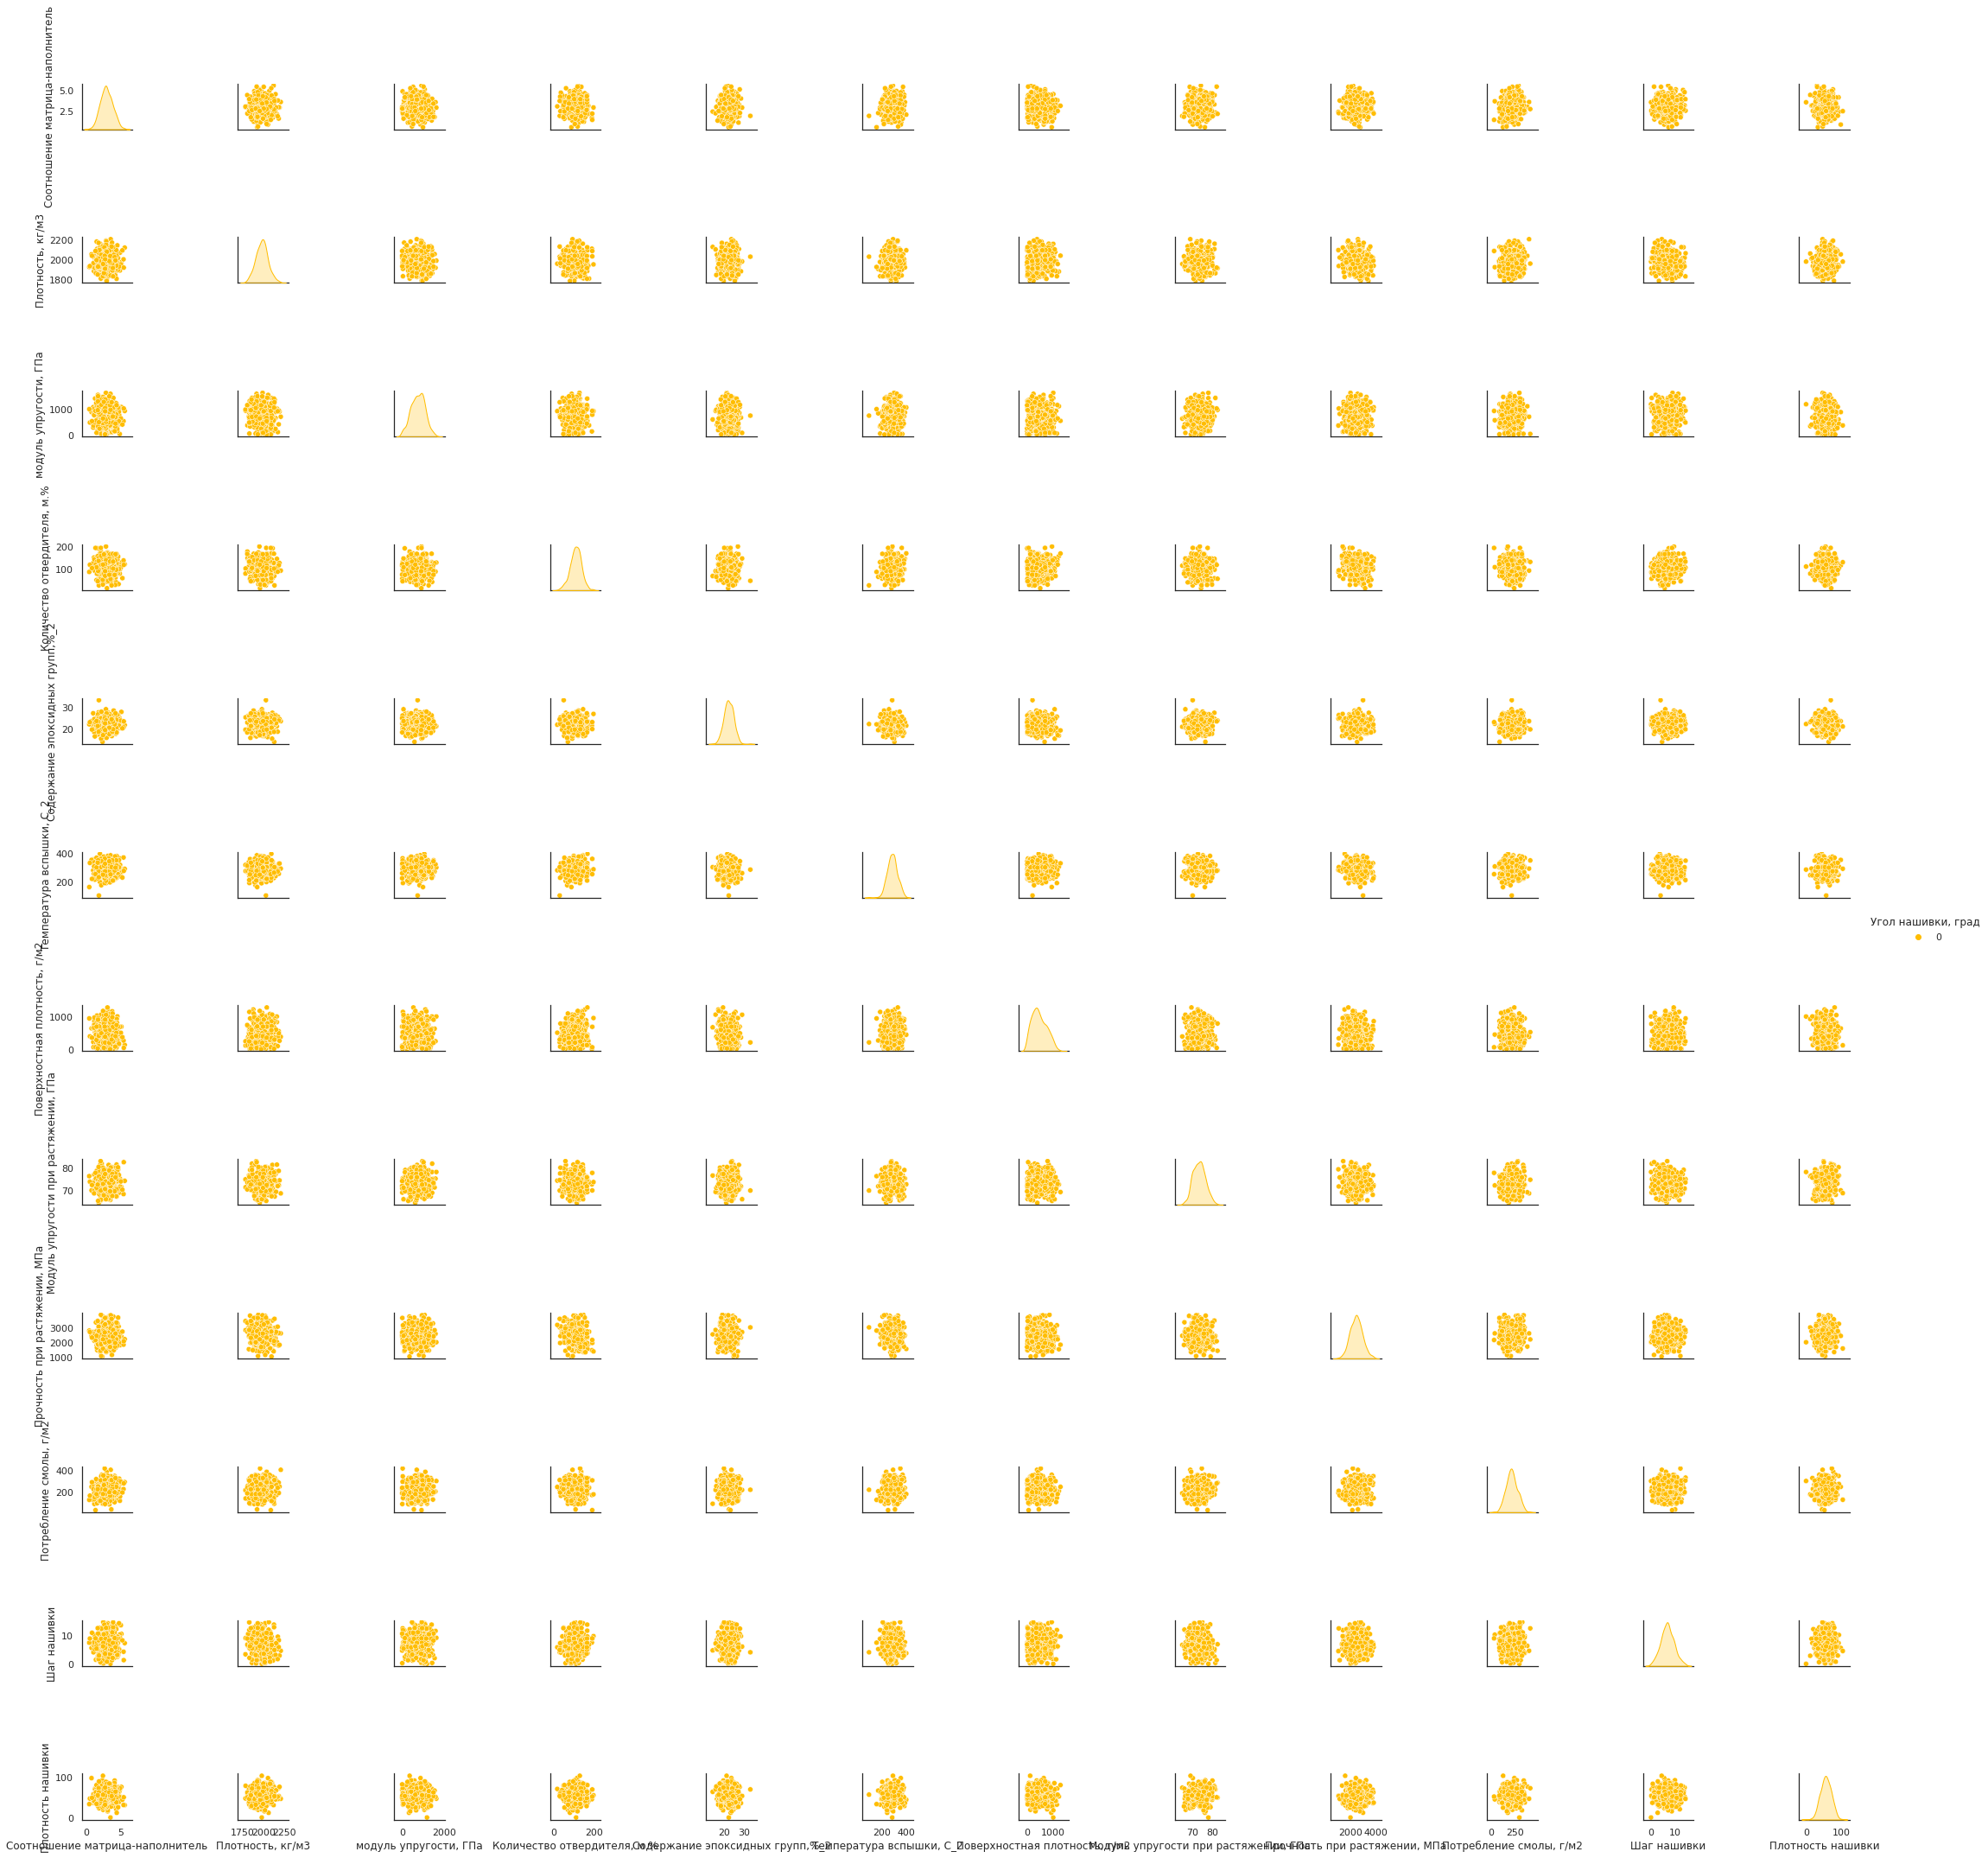

In [ ]:
sns.pairplot(data=df_pr[df_pr['Угол нашивки, град']==0], hue='Угол нашивки, град', palette='Wistia_r')


#Для угла нашивки = 90 градусов 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


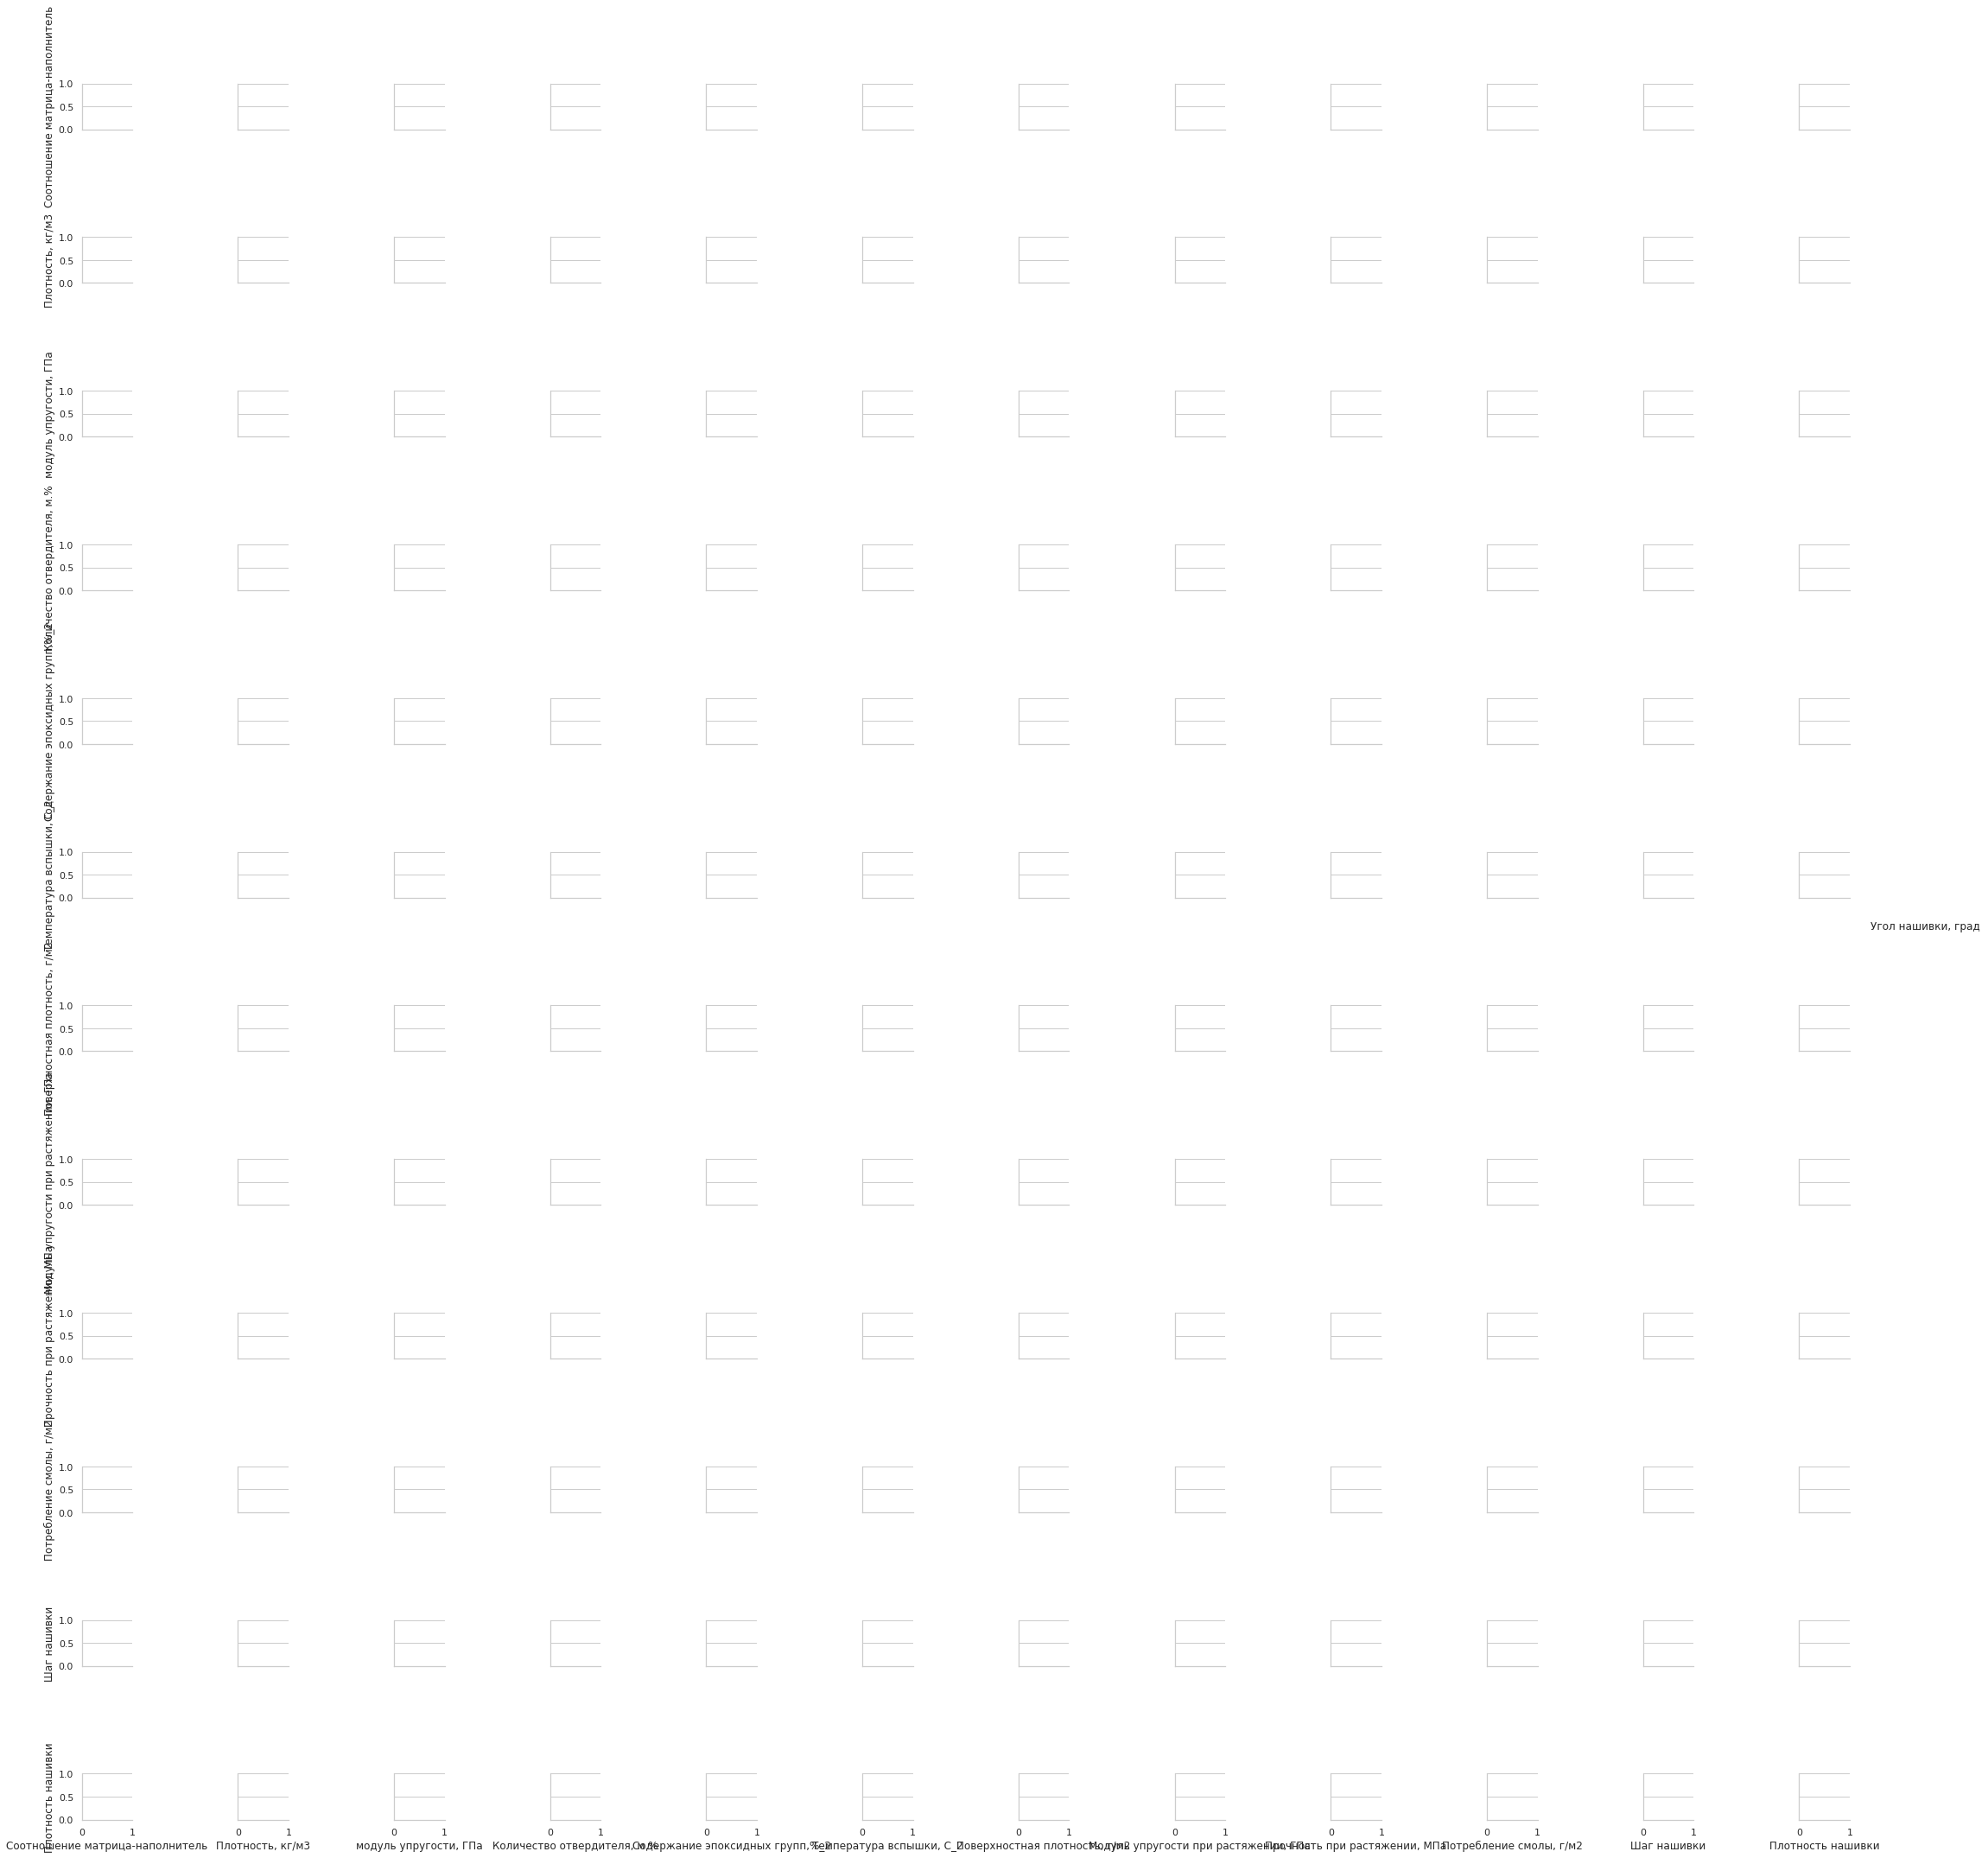

In [44]:
sns.pairplot(data=df_pr[df_pr['Угол нашивки, град']==90], hue='Угол нашивки, град', palette='Purples_r')

# По попарным графикам рассеивания делаем следующие выводы:
-
- регрессия не вырисовывается,возможно данные связывает сложная, нелинейная зависимость

##Посмотрим значения коэффициентов корреляции

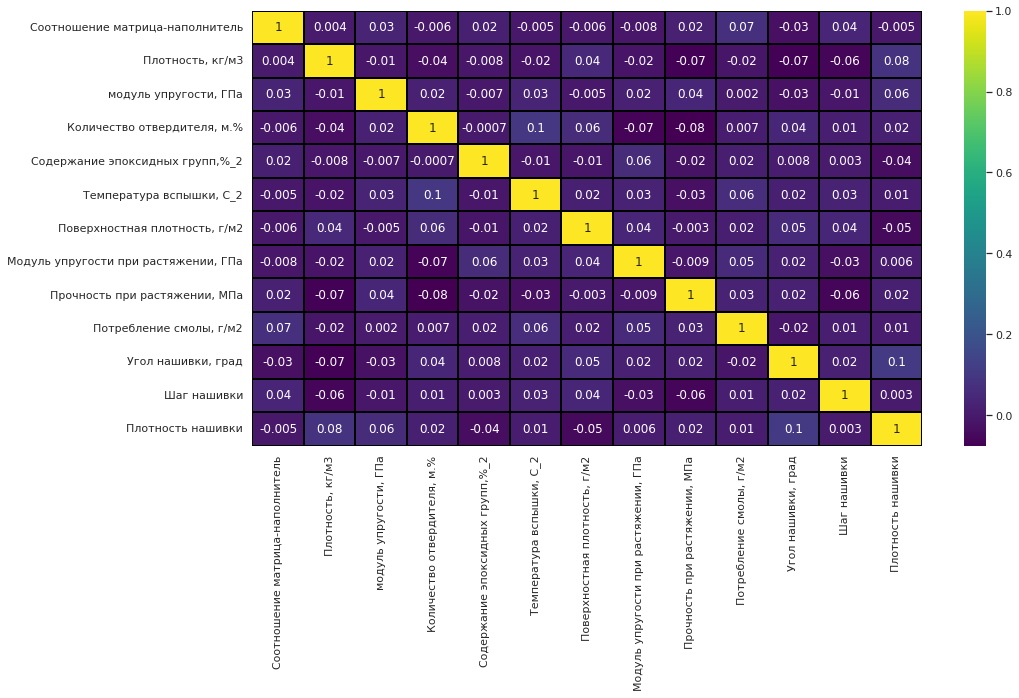

In [45]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_pr.corr(), annot = True, fmt='.1g', cmap='viridis', linewidths=1, linecolor='black')


#Как видим из тепловой карты корреляция данных близка к 0, что подтверждает отсутсвие линейной зависимости

##Матричная диаграмма рассеивания

Матричная диаграмма рассеивания представляет собой все возможные попарные даиграммы рассеивания, представленные в виде большой квадратной матрицы 

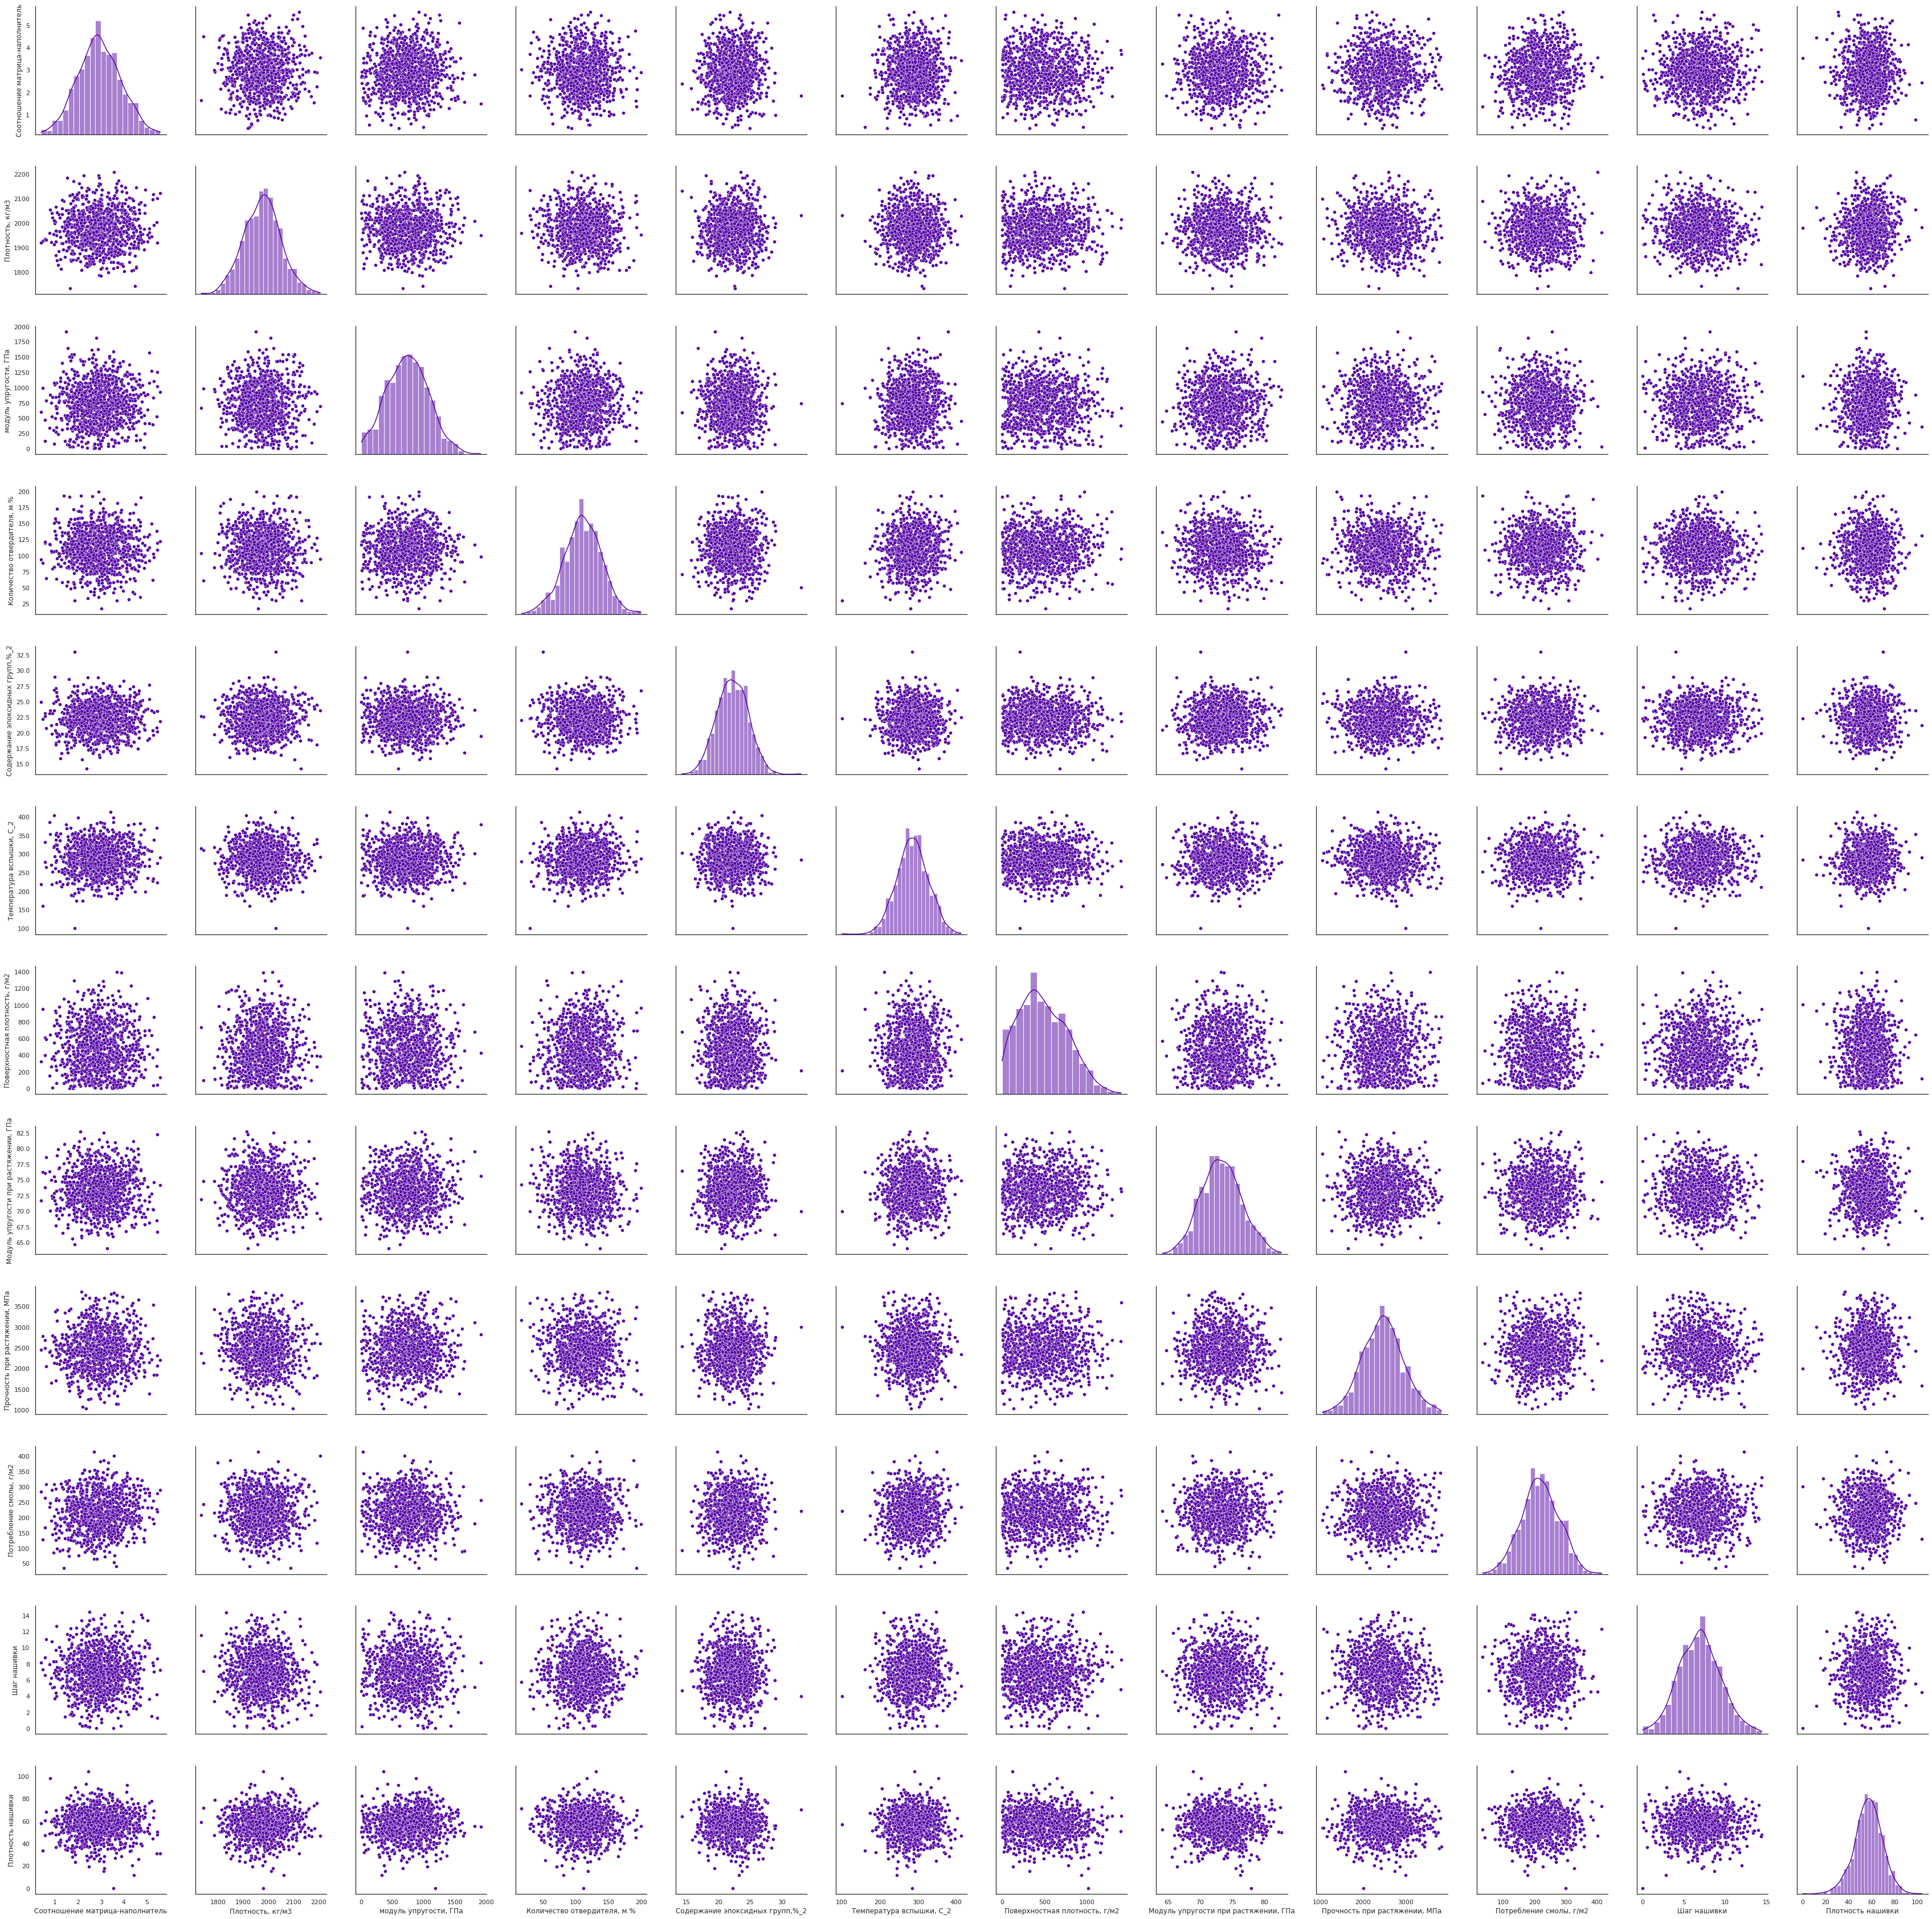

In [46]:
df_temp1 = df_pr.drop(['Угол нашивки, град'], axis='columns')
sns.set(
    style="white",
    palette="plasma",
)
g = sns.PairGrid(df_temp1, diag_sharey=True, height=4)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.scatterplot);



##Предобработка данных

##Нормализуем датасет с помощью MinMaxScaler.  MinMax Scaler сжимает данные в заданном диапазоне, обычно от 0 до 1

In [71]:
# import module
from sklearn.preprocessing import MinMaxScaler
 
# create data
data = df_pr
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)

[[0.28213084 0.62653324 0.38567917 ... 0.         0.2769983  0.54813542]
 [0.28213084 0.62653324 0.38567917 ... 0.         0.2769983  0.57698465]
 [0.28213084 0.62653324 0.38567917 ... 0.         0.2769983  0.67314876]
 ...
 [0.55575038 0.50547008 0.21706548 ... 1.         0.28815814 0.65035483]
 [0.63739572 0.70384225 0.38711371 ... 1.         0.43718647 0.56026242]
 [0.65713085 0.33328967 0.21731676 ... 1.         0.42096135 0.74464166]]


###Decision Tree Regressor

In [22]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
  

data = df_pr.make_classification(
    n_samples=100, n_features=2, n_informative=2, n_classes=3, 
    n_redundant=0, n_clusters_per_class=1, random_state=3
)

data.shape



AttributeError: ignored

##Исключение выбрасов

Удалим выбросы, используя IQR:
-Рассчитаем первый и третий квартиль (Q1 и Q3)
- Оценим межквартильный диапазон, IQR-Q1
- Оценим нижнюю границу, ниже *1,5
- Оценим верхнюю границу, верхний *1,5
- Замените точки данных,которые лежат за пределами нижней и верхней границы на nan
*** Удалять выбросы будем отдельно для данных с углом нишивки 0 и с углом нашивки 90





In [48]:
for column in df_pr[df_pr['Угол нашивки, град']==0].columns:
  q75,q25 = np.percentile(df_pr.loc[:,column],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  df_pr.loc[df_pr[column] < min,column] = np.nan
  df_pr.loc[df_pr[column] > min,column] = np.nan


In [49]:
for column in df_pr[df_pr['Угол нашивки, град']==1].columns:
  q75,q25 = np.percentile(df_pr.loc[:,column],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  df_pr.loc[df_pr[column] < min,column] = np.nan
  df_pr.loc[df_pr[column] > min,column] = np.nan

In [50]:
##Сумма подсчёта нулевых значений/выбросов в каждом столбце набора данных:   ОШИБКА НЕ ДОЛЖНОЬ БЫТЬ 1023
df_pr.isnull().sum()


Соотношение матрица-наполнитель         1023
Плотность, кг/м3                        1023
модуль упругости, ГПа                   1023
Количество отвердителя, м.%             1023
Содержание эпоксидных групп,%_2         1023
Температура вспышки, С_2                1023
Поверхностная плотность, г/м2           1023
Модуль упругости при растяжении, ГПа    1023
Прочность при растяжении, МПа           1023
Потребление смолы, г/м2                 1023
Угол нашивки, град                      1023
Шаг нашивки                             1023
Плотность нашивки                       1023
dtype: int64

## Нормализация данных

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

scaler = preprocessing.MinMaxScaler()
df_2_norm = pd.DataFrame(scaler.fit_transform(df_m2), columns = df_m2.columns, index = df_m2.index)
df_MU_n = scaler_MU.fit_transform(np.array(df_m2)['Модуль упркгости при растяжении, ГПа']).reshape(-1,1)
df_PRU_n = scaler_PR.fit_transform(np.array(df_m2)['Прочность при растяжении, Мпа']).reshape(-1,1)
df_MX_n = scaler_MX.fit_transform(np.array(df_m2)['Соотношение матрица-наполнитель']).reshape(-1,1)



NameError: ignored

In [ ]:
df_m2_norm.to_excel('X_proc_n.xlsx')


#Контрольная проверка на выбросы

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxplot(X="variable", y="value", data=pd.melt(df_m2_norm))


In [ ]:
mms = MinMaxScaler()
df_pr_clear_norm = pd.DataFrame(mms.fit_transform(df_pr_clear), columns=df_pr_clear.columns, index=df_pr_clear.index)  ##проверить где оштбка



NameError: ignored

##Прогноз модуля упркгости при растяжении


#Для прогноза модуля упругости при растяжении будем использовать метод Random Forest

In [ ]:
X = df_clear.drop('Модуль упругости при растяжении, Гпа', axis=1)
y = df_clear('Модуль упругости при растяжении, Гпа', axis=1)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2,  random_state=1)




NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto, 'sqrt', 'log2'],
     'max_depth': [4,5,6,7,8],
     'criterion': ['squared_error']    
}

In [ ]:
rf = GSCV.best_estimator


In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.predict(X_test)


In [ ]:
y_test

In [ ]:
np.mean(np.abs(y_test-rf.predict(X_test)))


##Прогноз прочности при растяжении

Для прогноза прочности при растяжениии будем использовать метод RandomForest

##Нейросеть для рекомендации соотношение матрица-наполнитель #2

In [10]:
X = df_clear.drop('Соотношение матрица-наполнитель', axis=1)
y = df_clear['Соотношение матрица-наполнитель']


NameError: ignored

In [ ]:
np.set_printoptions(precision=3, suppress=True)


In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)


2.8.0


In [ ]:
import datetime


In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
       norm,
       layers.Dense(128, activation='relu'),
       layers.Dense(64, activation='relu'), 
       layers.Dense(1)       
    ])

model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))
return model



In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,10])
  plt.xlabel('Эпоха')
  plt.ylabel('MAE [MPG]')
  plt.legend()
  plt.grid(True)
  

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)


In [ ]:
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(1)
])

dnn_model.compile(loss='mean_squared_error',
          optimizer=tf.keras.optimizers.Adam(0.001)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
              
dnn_madel = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val)
    verbose=0, epochs=300,
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)





##Посмотри описательную статистику

In [ ]:
df_clear_norm.describe()

## 2.2 Разработка и обучение моделей

#введём отдельный класс "Model" для обозначения моделей с различными параметрами

Строим модель Линейной Регрессии

Байесовская регрессия

Гребневая регрессия

Лассо регрессия

Случайный лес

К ближайших соседей

## Нейронные сети

Строить сети будем с помощью модуля keras библиотеки tenserflow

напишем нормализатор (стандартизатор)

сперва попробуем линейную модель

Построим для нормализованного набора данных

Многослойный персептрон

In [ ]:
adam1 = keras.optimizers.Adam(learning_rate=0.001)
lrs = [
      normal,
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(1)]

   def build_and_compile(lrs, opt):
     model = None
     model = keras.Sequential(lrs)
     model.compile(optimizer=opt,
           loss='mean_squared_error',
           metrics=['mae', 'RootMeanSquaredError'])
     return model




In [ ]:
dnn_model = build_and_compile(lrs,adam1)
dnn_model.summary()


In [ ]:
%%time
history5 = dnn_model.fit(
    X_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
    validation_data=(X_val, y_val)
)

In [ ]:
sns.set(palette = "tab10", style = "whitegrid")
plot_loss(history5, lim = [0,5])


In [ ]:
df_DNN = errors(dnn_model, X_train, X_test, y_train, y_test,
    name = 'DNN_3x64', trg = 'Соотношение матрица-наполнитель', rmse = False, score = False)
df_DNN

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, model_DNN_5x128.predict(X_test), label='Predict')
plt.plot([1, 5], [1, 5], color='k', label='model')
plt.xlabel('fact values')
plt.ylabel('predict')
plt.lagend()


Добавим dropout слои и посчитаем mlp модели с различными оптимизаторами

In [ ]:
lrs2 = [
      normal,
        layers.Dense(128, activation='relu'),
        layers.Dropout(0,5),
        layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1)]
def multopt(lrs, opt = []):
    mult = {}
    for i in opt:
      model = 0
      model = built_and_compile(lrs,i)
      hist = model.fit(
          X_train,
          y_train,
          epochs=1000,
          verbose=0,
          callbacks=[early_stop],
          validation_data=(X_val, y_val)
         )
      mult[i] = model.evaluate(X_test, y_test, verbose=0)
      return mult


multopt_DNN_5x128 = multopt(lrs2,optmz1)


NameError: ignored

In [ ]:
multopt_DNN_5x128 = multopt(lrs2,optmz1)

NameError: ignored

In [ ]:
adam1 = keras.optimizers.Adam(learning_rate=0.004)
model_DNN_5x128 = keras.Sequential(lrs2)

NameError: ignored

In [ ]:
model_DNN_5x128.compile(optomizer=adam1,
        loss='mean_squared_error',
        metrics=['mae', 'RootMeanSquaredError'])
model_DNN_5x128.summary()

NameError: ignored

In [ ]:
history_6 = model_DNN_5x128.fit(
    X_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[earl_stop(30)],
    validation_data=(X_val, y_val))

In [ ]:
plot_loss(history_6, lim = [0,5])


In [ ]:
df_DNN_Do = errors(model_DNN_5x128, X_train, X_test, y_train, y_test,
        name = 'DNN_5x128_Do', trg = 'Соотношение матрица-наполнитель', rmse = False, score = False)
df_DNN_Do




In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, model_DNN_5x128.predict(X_test), label='Predict')
plt.plot([1, 5], [1, 5], color='k', label='model')
plt.xlabel('fact values')
plt.ylabel('predict')
plt.lagend()


In [ ]:
multopt_DNN_5x128

In [ ]:
## выгрузим модель
model_DNN_5x128.save("models/Matrix_model")



### Сам пытаюсь НЕЙРОСЕТЬ 

In [72]:
##создание выборки
df = df_pr
df.head()






Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                   0          4.0   
1.0                    220.0                   0          4.0   
2.0                    220.0                   0          4.0   
3.0                    220.0                   0          5.0   
4.0                    220.0                   0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

In [73]:
df.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

In [74]:
df.isna().sum() ##смотрим пропуски, пропусков нет, пропуски равны нулю


Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [75]:
dataset = df


In [179]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [176]:
dataset.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                   0          4.0   
1.0                    220.0                   0          4.0   
2.0                    220.0                   0          4.0   
3.0                    220.0                   0          5.0   
4.0                    220.0                   0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

In [177]:
dataset.isna().sum() ##Проверяем на пропуски- пропусков нет

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [178]:
dataset = dataset.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


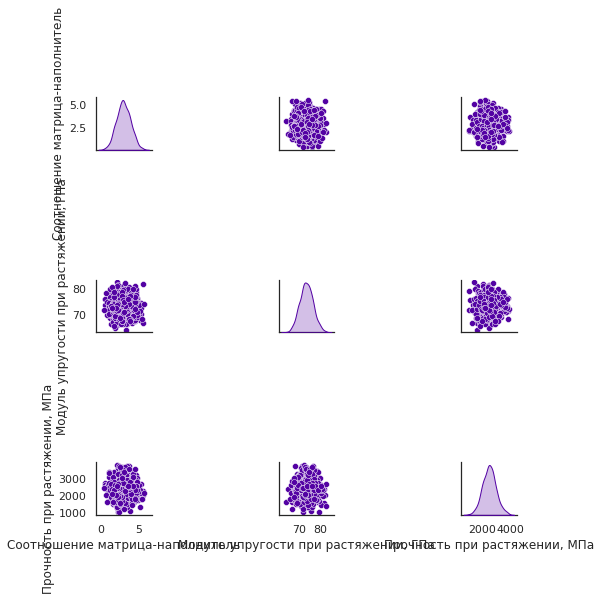

In [180]:
sns.pairplot(train_dataset[['Соотношение матрица-наполнитель','Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']], diag_kind='kde')


In [182]:
train_dataset.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       818.0     2.943975    0.922190   
Плотность, кг/м3                      818.0  1974.377546   74.987638   
модуль упругости, ГПа                 818.0   741.514342  329.799496   
Количество отвердителя, м.%           818.0   111.192968   27.797189   
Содержание эпоксидных групп,%_2       818.0    22.249671    2.395012   
Температура вспышки, С_2              818.0   286.243917   41.283747   
Поверхностная плотность, г/м2         818.0   490.129423  280.043448   
Модуль упругости при растяжении, ГПа  818.0    73.368702    3.091888   
Прочность при растяжении, МПа         818.0  2467.736562  475.680895   
Потребление смолы, г/м2               818.0   217.257584   59.206795   
Угол нашивки, град                    818.0     0.487775    0.500156   
Шаг нашивки                           818.0     6.879073    2.611603   
Плотность нашивки                     818.0    57.288675   12.290801   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.320191     2.919678   
Плотность, кг/м3                      1731.764635  1922.343882  1975.555671   
модуль упругости, ГПа                    2.436909   502.628230   742.886633   
Количество отвердителя, м.%             29.956150    93.306043   111.507330   
Содержание эпоксидных групп,%_2         14.254985    20.607747    22.267857   
Температура вспышки, С_2               100.000000   260.274330   286.220763   
Поверхностная плотность, г/м2            1.894093   273.012973   463.881777   
Модуль упругости при растяжении, ГПа    64.054061    71.337855    73.342472   
Прочность при растяжении, МПа         1036.856605  2148.096359  2457.959767   
Потребление смолы, г/м2                 33.803026   179.604490   217.277006   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.037639     5.000000     6.943337   
Плотность нашивки                       11.740126    50.036793    57.328584   

                                              75%          max  
Соотношение матрица-наполнитель          3.583641     5.591742  
Плотность, кг/м3                      2021.186675  2207.773481  
модуль упругости, ГПа                  966.871905  1911.536477  
Количество отвердителя, м.%            129.689233   198.953207  
Содержание эпоксидных групп,%_2         23.952628    33.000000  
Температура вспышки, С_2               313.518533   403.652861  
Поверхностная плотность, г/м2          697.683605  1399.542362  
Модуль упругости при растяжении, ГПа    75.486822    82.682051  
Прочность при растяжении, МПа         2759.418283  3848.436732  
Потребление смолы, г/м2                256.462864   414.590628  
Угол нашивки, град                       1.000000     1.000000  
Шаг нашивки                              8.579164    14.440522  
Плотность нашивки                       65.146638   103.988901

In [183]:
test_dataset.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       205.0     2.876061    0.876607   
Плотность, кг/м3                      205.0  1981.151015   68.383312   
модуль упругости, ГПа                 205.0   733.574320  332.684485   
Количество отвердителя, м.%           205.0   108.088041   30.147529   
Содержание эпоксидных групп,%_2       205.0    22.223317    2.456663   
Температура вспышки, С_2              205.0   284.438617   39.620991   
Поверхностная плотность, г/м2         205.0   453.213645  285.111984   
Модуль упругости при растяжении, ГПа  205.0    73.168438    3.227609   
Прочность при растяжении, МПа         205.0  2463.675905  524.664867   
Потребление смолы, г/м2               205.0   223.074010   61.731237   
Угол нашивки, град                    205.0     0.507317    0.501170   
Шаг нашивки                           205.0     6.979623    2.365969   
Плотность нашивки                     205.0    56.616261   12.604312   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.875458     2.279886     2.852588   
Плотность, кг/м3                      1816.107716  1935.851491  1984.144357   
модуль упругости, ГПа                   31.608469   483.432500   710.407173   
Количество отвердителя, м.%             17.740275    88.335517   108.053040   
Содержание эпоксидных групп,%_2         16.704108    20.627116    22.141560   
Температура вспышки, С_2               187.562353   255.190945   284.615385   
Поверхностная плотность, г/м2            0.603740   225.523884   416.375465   
Модуль упругости при растяжении, ГПа    65.793845    70.713530    72.825524   
Прочность при растяжении, МПа         1145.065757  2110.604619  2460.997418   
Потребление смолы, г/м2                 64.524180   179.858423   223.536269   
Угол нашивки, град                       0.000000     0.000000     1.000000   
Шаг нашивки                              0.000000     5.366960     6.818547   
Плотность нашивки                        0.000000    48.959084    57.499988   

                                              75%          max  
Соотношение матрица-наполнитель          3.426368     5.295842  
Плотность, кг/м3                      2021.754641  2158.794836  
модуль упругости, ГПа                  939.859009  1815.865170  
Количество отвердителя, м.%            130.477891   191.053004  
Содержание эпоксидных групп,%_2         24.143841    28.620116  
Температура вспышки, С_2               308.697009   413.273418  
Поверхностная плотность, г/м2          640.050777  1291.340115  
Модуль упругости при растяжении, ГПа    75.030517    81.053293  
Прочность при растяжении, МПа         2784.289491  3817.269484  
Потребление смолы, г/м2                268.644548   383.663401  
Угол нашивки, град                       1.000000     1.000000  
Шаг нашивки                              8.682344    12.656475  
Плотность нашивки                       64.481331    86.012427

In [125]:
train_features = train_dataset.copy() ## делим на тренировочные и  тестирующие выборки
test_features = test_dataset.copy()

train_labels = train_features.pop('Соотношение матрица-наполнитель')
test_labels = test_features.pop('Соотношение матрица-наполнитель')


In [184]:
train_dataset.describe().transpose()[['mean', 'std']] ##среднее значение стандартного отклонения

mean         std
Соотношение матрица-наполнитель          2.943975    0.922190
Плотность, кг/м3                      1974.377546   74.987638
модуль упругости, ГПа                  741.514342  329.799496
Количество отвердителя, м.%            111.192968   27.797189
Содержание эпоксидных групп,%_2         22.249671    2.395012
Температура вспышки, С_2               286.243917   41.283747
Поверхностная плотность, г/м2          490.129423  280.043448
Модуль упругости при растяжении, ГПа    73.368702    3.091888
Прочность при растяжении, МПа         2467.736562  475.680895
Потребление смолы, г/м2                217.257584   59.206795
Угол нашивки, град                       0.487775    0.500156
Шаг нашивки                              6.879073    2.611603
Плотность нашивки                       57.288675   12.290801

In [127]:
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2.8.2


In [185]:
##Нормализация -  преобразование признака (адаптируем к тренировочным и обучающим примерам) аналог  пункту выше
normalizer = tf.keras.layers.Normalization(axis=-1)


In [186]:
normalizer.adapt(np.array(train_features))


In [187]:
print(normalizer.mean.numpy())


[[1.9743774e+03 7.4151428e+02 1.1119297e+02 2.2249670e+01 2.8624396e+02
  4.9012936e+02 7.3368690e+01 2.4677363e+03 2.1725755e+02 4.8777500e-01
  6.8790722e+00 5.7288673e+01]]


In [188]:
first = np.array(train_features[:1]) ##Преобразование для Первого примера выборки: была с характеристиками(First exampl) и стала (Normalized)  

with np.printoptions(precision=2):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())


First example: [[1.98e+03 1.24e+02 1.36e+02 1.85e+01 3.18e+02 1.72e+02 7.30e+01 2.22e+03
  1.32e+02 1.00e+00 7.01e+00 6.62e+01]
 [1.92e+03 4.78e+02 1.06e+02 1.79e+01 3.28e+02 5.27e+02 7.23e+01 3.06e+03
  2.76e+02 1.00e+00 5.00e+00 7.00e+01]
 [1.95e+03 1.05e+02 1.04e+02 2.39e+01 3.08e+02 8.09e+02 7.58e+01 1.40e+03
  3.00e+02 0.00e+00 1.16e+01 3.49e+01]
 [2.05e+03 1.14e+03 1.36e+02 2.25e+01 2.75e+02 1.23e+03 7.66e+01 2.58e+03
  1.88e+02 1.00e+00 1.02e+01 6.32e+01]
 [1.93e+03 1.11e+03 6.26e+01 2.53e+01 2.94e+02 3.62e+02 7.65e+01 2.79e+03
  1.37e+02 0.00e+00 5.99e+00 4.86e+01]
 [2.03e+03 7.39e+02 5.00e+01 2.38e+01 2.85e+02 2.10e+02 7.00e+01 3.00e+03
  2.20e+02 0.00e+00 4.00e+00 6.00e+01]]

Normalized: [[ 0.04 -1.87  0.88 -1.56  0.78 -1.14 -0.13 -0.52 -1.44  1.02  0.05  0.72]
 [-0.75 -0.8  -0.19 -1.83  1.02  0.13 -0.33  1.24  0.99  1.02 -0.72  1.03]
 [-0.3  -1.93 -0.24  0.69  0.54  1.14  0.8  -2.25  1.41 -0.98  1.83 -1.82]
 [ 1.01  1.2   0.89  0.1  -0.27  2.65  1.04  0.25 -0.5   1.02  1.25 

In [ ]:
##Нейронная сеть или простая линейная модель кол-во нгнейронов=1 !!!! Построениеи линейной модели от Модуля упругости

In [190]:
MU = np.array(train_features['Модуль упругости при растяжении, ГПа'])

MU_normalizer = layers.Normalization(input_shape=[1,], axis=None) ##Нормалайзер который адаптируемся к модулю упругости
MU_normalizer.adapt(MU)


In [191]:
MU_model = tf.keras.Sequential([
     MU_normalizer,
     layers.Dense(units=1)                            
   ])

MU_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [192]:
MU_model.predict(MU[:10])  ##Предсказываем для первых 10 выход нашей нейронной сети
  

array([[ 0.11662165],
       [ 0.29633114],
       [-0.71167076],
       [-0.92757845],
       [-0.90525484],
       [ 0.9758237 ],
       [-0.34428236],
       [ 0.2119584 ],
       [ 0.8326484 ],
       [-1.0780624 ]], dtype=float32)

In [193]:
train_labels.values[:10] ## То что мы имеем - значения не похожи

array([1.42418931, 3.30553542, 2.96581179, 4.30189057, 3.30766349,
       1.85714286, 2.06630121, 1.48409568, 2.91828885, 2.95109153])

In [194]:
##Делаем значения похожими - скомпилируем 
MU_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
    )


In [195]:
## Запускаем обучение
%%time
history = MU_model.fit(
    train_features['Модуль упругости при растяжении, ГПа'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)


Epoch 1/100
3/3 [==============================] - 0s 26ms/step - loss: 2.7168
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 2.4174
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 2.1418
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 1.8802
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 1.6010
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 1.3473
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 1.1416
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9546
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8257
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7920
Epoch 11/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7752
Epoch 12/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7944
Epoch 13/100
3/3 [==============================]

In [196]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


loss  epoch
95  0.770517     95
96  0.772406     96
97  0.770429     97
98  0.770934     98
99  0.771516     99

In [197]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error[MPG]')
    plt.legend()
    plt.grid(True)



KeyError: ignored

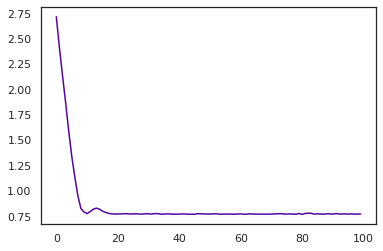

In [198]:
plot_loss(history)

In [199]:
test_results = {}

test_results['MU_model'] = MU_model.evaluate(
    test_features['Модуль упругости при растяжении, ГПа'],
    test_labels, verbose=0)

In [200]:
test_results

{'MU_model': 0.6941699385643005}

In [203]:
x = tf.linspace(0.0, 250, 251)
y = MU_model.predict(x)

In [210]:
def plot_MU(x,y):
    plt.scatter(train_features['Модуль упругости при растяжении, ГПа'], train_labels, labe='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('T')
    plt.ylabel('Соотношение матрица-наполнитель')
    plt.legend()


AttributeError: ignored

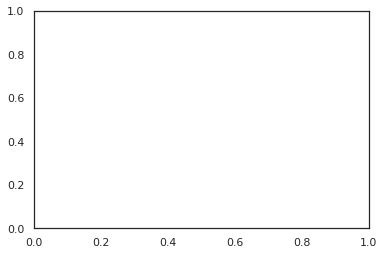

In [212]:
plot_MU(x,y)

##ПОСТРОЕНИЕ ЛИНЕЙНОЙ МОДЕЛИ

In [214]:
linear_model = tf.keras.Sequential([
     normalizer,
     layers.Dense(units=1)                               
])

In [215]:
linear_model.predict(train_features[:10])

array([[ 1.44732046e+00],
       [ 7.12406754e-01],
       [ 2.76513505e+00],
       [-2.02643704e+00],
       [-2.10496831e+00],
       [-1.58225799e+00],
       [ 2.22006512e+00],
       [-3.95279616e-01],
       [-4.77447696e-02],
       [-1.97242630e+00],
       [ 2.68997741e+00],
       [ 2.33250275e-01],
       [ 7.98175156e-01],
       [-4.69858825e-01],
       [ 9.55730379e-01],
       [-1.87338030e+00],
       [-1.57480454e+00],
       [-7.78151512e-01],
       [-5.23238599e-01],
       [-1.90717959e+00],
       [-4.32775050e-01],
       [ 9.46192980e-01],
       [-1.22284496e+00],
       [ 1.96719214e-01],
       [ 8.17808390e-01],
       [-8.46973419e-01],
       [ 1.43557274e+00],
       [ 1.34230924e+00],
       [-1.71184003e+00],
       [-1.42265105e+00],
       [-7.42411315e-01],
       [-1.53545594e+00],
       [-9.49778795e-01],
       [ 1.77697754e+00],
       [ 2.53546882e+00],
       [ 3.70860696e-01],
       [ 5.43392956e-01],
       [ 6.00973606e-01],
       [ 1.9

In [216]:
linear_model.layers[1].kernel

<tf.Variable 'dense_6/kernel:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.3122905 ],
       [-0.40274978],
       [ 0.67405474],
       [-0.14647782],
       [ 0.58801687],
       [-0.23073405],
       [-0.05394334],
       [-0.5915529 ],
       [ 0.49808908],
       [-0.4566005 ],
       [-0.12488759],
       [ 0.05476469]], dtype=float32)>

In [217]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [221]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
3/3 [==============================] - 0s 27ms/step - loss: 2.6803
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 2.2860
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 1.9996
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 1.7557
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 1.5027
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 1.2406
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0924
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.9505
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.8133
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7422
Epoch 11/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7259
Epoch 12/100
3/3 [==============================] - 0s 12ms/step - loss: 0.7307
Epoch 13/100
3/3 [==============================]

KeyError: ignored

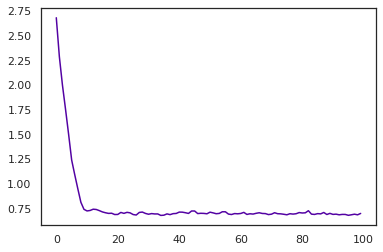

In [222]:
plot_loss(history)

In [224]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

##ПОСТРОЕНИЕ МНОГОСЛОЙНОГО ПЕРСЕПТРОНА

In [232]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)                        
    ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [233]:
dnn_MU_model = build_and_compile_model(MU_normalizer)
dnn_MU_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_10 (Dense)            (None, 64)                128       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [234]:
%%time
history = dnn_MU_model.fit(
    train_features['Модуль упругости при растяжении, ГПа'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.72 s, sys: 91.1 ms, total: 2.81 s
Wall time: 3.01 s


KeyError: ignored

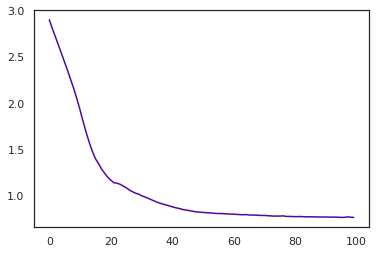

In [235]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_MU_model.predict(x)
plot_MU(x, y)

In [238]:
test_results['dnn_MU_model'] = dnn_MU_model.evaluate(
    test_features['Модуль упругости при растяжении, ГПа'], test_labels,
    verbose=0)

In [240]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_13 (Dense)            (None, 64)                832       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [243]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.7 s, sys: 102 ms, total: 2.8 s
Wall time: 3 s


In [ ]:
plot_loss(history)

In [245]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


In [248]:
pd.DataFrame(test_results, index=['Mean absolute error [Соотношение матрица-наполнитель]']).T


Mean absolute error [Соотношение матрица-наполнитель]
MU_model                                               0.694170    
linear_model                                           0.796532    
dnn_MU_model                                           0.705397    
dnn_model                                              0.984796

NameError: ignored

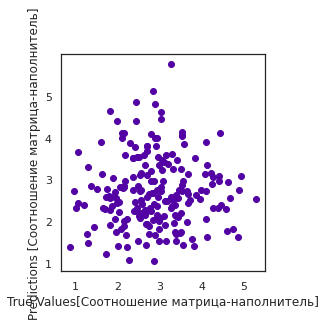

In [249]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values[Соотношение матрица-наполнитель]')
plt.ylabel('Predictions [Соотношение матрица-наполнитель]')
lims = [0,50]
plt.xlim(lins)
plt.ylim(lins)
_ = plt.plot(lims, lims)

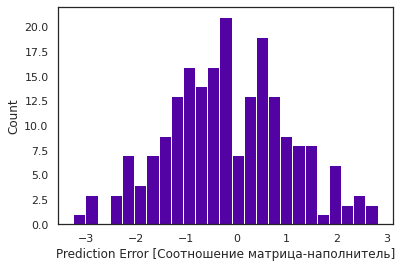

In [252]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Соотношение матрица-наполнитель]')
_ =plt.ylabel('Count')

In [253]:
test_results

{'MU_model': 0.6941699385643005,
 'dnn_MU_model': 0.7053966522216797,
 'dnn_model': 0.9847960472106934,
 'linear_model': 0.796531617641449}

In [ ]:
###ЧЕРНОВИК

In [13]:
##Создание выборки
X, y = df.values[:], df.values[:]

In [254]:
df['plt.plot(history.history['loss'], label='loss')'].value_counts()

SyntaxError: ignored

In [14]:
df['Прочность при растяжении, МПа'].value_counts()

3000.000000    9
2455.555556    5
2000.000000    5
1800.000000    4
2071.715856    1
              ..
2167.533030    1
2300.777919    1
2363.621230    1
2038.469587    1
2856.328932    1
Name: Прочность при растяжении, МПа, Length: 1004, dtype: int64

In [15]:
X = X.astype('float32') #приводим значение к float

In [16]:
X[1]

array([1.8571428e+00, 2.0300000e+03, 7.3873682e+02, 5.0000000e+01,
       2.3750000e+01, 2.8461539e+02, 2.1000000e+02, 7.0000000e+01,
       3.0000000e+03, 2.2000000e+02, 0.0000000e+00, 4.0000000e+00,
       6.0000000e+01], dtype=float32)

In [26]:
y[1]

array([1.85714286e+00, 2.03000000e+03, 7.38736842e+02, 5.00000000e+01,
       2.37500000e+01, 2.84615385e+02, 2.10000000e+02, 7.00000000e+01,
       3.00000000e+03, 2.20000000e+02, 0.00000000e+00, 4.00000000e+00,
       6.00000000e+01])

In [34]:
y = LabelEncoder().fit_transform(y)

ValueError: ignored

In [31]:
### train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(716, 13)
(307, 13)
(716, 13)
(307, 13)


In [170]:
from sklearn.metrics import accuracy_score

In [255]:
model = keras.Sequential()

model.add(Dense(20, activation ='relu', input_shape = (n_features,) ))
model.add(Dense(10, activation ='relu')


model.compile(optimizer = 'adam',loss = 'binary_crossentropy')

history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))




SyntaxError: ignored

In [ ]:
)